In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
## Import Library

In [2]:
data = pd.read_excel('Dryad_English_Raw.xlsx')
## Reading datasets

FileNotFoundError: [Errno 2] No such file or directory: 'Dryad_English_Raw.xlsx'

# Data pre-processing and cleaning

In [3]:
data.head()
## View the imported dataset

,ID_No,Gender,Age (years),Time slice No.,Cummulated Time since first admission (months),Death,Overall Survival Time (months),Cause and type of Hepatitis,Treatment Response in last Time slice,CR/PR?,...,No. of intrahepatic lesions,New lesions?,Portal Vein invation?,Branch of invaded portal vein,Invasion of hepatic veins,Invasion of Vena Canva or Atrium,Ascites,Distant Metastasis,Lymph node metastasis,Groups in survival Path system
0,Deri_Patient1,1,60,1,0.0,1,41.1,1,NaN,NaN,...,3.0,0,0.0,0,0,0,0.0,0.0,0,1000000000
1,Deri_Patient1,1,60,2,3.0,1,38.1,1,1.0,1.0,...,0.0,0,0.0,0,0,0,0.0,0.0,0,1100000000
2,Deri_Patient1,1,61,3,7.6,1,33.5,1,1.0,1.0,...,0.0,0,0.0,0,0,0,0.0,0.0,0,1110000000
3,Deri_Patient2,1,52,1,0.0,0,115.3,1,NaN,NaN,...,3.0,0,0.0,0,0,0,0.0,0.0,0,1000000000
4,Deri_Patient2,1,52,2,2.8,0,112.5,1,1.0,1.0,...,0.0,0,0.0,0,0,0,0.0,0.0,0,1100000000


In [4]:
data.info()
## View dataset data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID_No                                           3774 non-null   object 
 1   Gender                                          3774 non-null   int64  
 2   Age (years)                                     3774 non-null   int64  
 3   Time slice No.                                  3774 non-null   int64  
 4   Cummulated Time since first admission (months)  3774 non-null   float64
 5   Death                                           3774 non-null   int64  
 6   Overall Survival Time (months)                  3774 non-null   float64
 7   Cause and type of Hepatitis                     2165 non-null   object 
 8   Treatment Response in last Time slice           2765 non-null   float64
 9   CR/PR?                                   

In [5]:
data.isnull().sum()
#View Void Values

ID_No                                                0
Gender                                               0
Age (years)                                          0
Time slice No.                                       0
Cummulated Time since first admission (months)       0
Death                                                0
Overall Survival Time (months)                       0
Cause and type of Hepatitis                       1609
Treatment Response in last Time slice             1009
CR/PR?                                            2044
AFP (ng/ml)                                        330
Hgb (g/L)                                          512
PLT (10E9/L)                                       513
WBC(10E9/L)                                        529
AST (U/L)                                          323
LDH (U/L)                                          303
ALB (g/L)                                          315
TBLT(umol/L)                                       322
C-Reative 

# In following features may be obtained when patients have initial contact with the healthcare system, such as during preliminary medical examinations or screening before hospitalization:

In [6]:
#Gender
#Age (years)
#AFP (ng/ml): Alpha-fetoprotein, a routine marker for liver cancer detection
#Hgb (g/L): Hemoglobin, a component of a complete blood count (CBC) test
#PLT (10E9/L): Platelet count, a component of a complete blood count (CBC) test
#WBC (10E9/L): White blood cell count, a component of a complete blood count (CBC) test
#AST (U/L): Aspartate aminotransferase, a liver function test
#LDH (U/L): Lactate dehydrogenase, a routine blood test
#ALB (g/L): Albumin, a routine blood test and part of liver function evaluation
#TBLT (umol/L): Total bilirubin, part of liver function evaluation
#C-Reactive Protein; CRP (mg/L): C-reactive protein, an indicator of inflammation in the blood
#PT (seconds): Prothrombin time, a test for blood coagulation


# In more specific medical settings, the following features may be obtained during the diagnosis of liver disease or liver cancer, or during the assessment of patients who have already been diagnosed:

In [7]:
#Cause and type of Hepatitis
#Hepatic encephalopathy: Whether hepatic encephalopathy is present, which is a complication of liver disease
#Diameter of main tumor (mm): The size of the main tumor
#Location of Lesions: The site of the lesions
#No. of intrahepatic lesions: The number of lesions within the liver
#New lesions?: Whether there are any new lesions
#Portal Vein invasion?: Whether there is invasion of the portal vein
#Branch of invaded portal vein: The specific branch of the portal vein that is invaded
#Invasion of hepatic veins: Whether there is invasion of the hepatic veins
#Invasion of Vena Cava or Atrium: Whether there is invasion of the vena cava or atrium
#Ascites: Whether ascites (fluid accumulation in the abdomen) is present
#Distant Metastasis: Whether there is distant metastasis
#Lymph node metastasis: Whether there is lymph node metastasis
#Groups in survival Path system: Groups in the survival pathway system for prognosis assessment


# Additionally, the following features may be obtained after the patient has started treatment:

In [8]:
#Cumulated Time since first admission (months): The accumulated time from the first admission to the time of data collection (in months)
#Death: Indicator of whether the patient has died
#Overall Survival Time (months): Total survival time in months
#Treatment Response in last Time slice: Treatment response in the most recent time interval
#CR/PR?: Complete response (CR)/Partial response (PR) status


In [9]:
#In addition, since the following indicators have more vacancies in the dataset, these feature columns will be removed in the modeling
#C-Reative Protein;CRP (mg/L)                       861
#Cause and type of Hepatitis                       1609
#Treatment Response in last Time slice             1009
#CR/PR?                                            2044
#PT (seconds)                                      1750
#PT Percentage (%)                                 1753

In [10]:
#Remove features by column that have a high number of associated null values
columns_to_drop = ["C-Reative Protein;CRP (mg/L)", "Cause and type of Hepatitis", 
                   "Treatment Response in last Time slice", "CR/PR?", "PT (seconds)", 
                   "PT Percentage (%)"]
data = data.drop(columns=columns_to_drop)

In [11]:
# Delete vacant values by row
data = data.dropna()
#ViewDataSet
data.head()

,ID_No,Gender,Age (years),Time slice No.,Cummulated Time since first admission (months),Death,Overall Survival Time (months),AFP (ng/ml),Hgb (g/L),PLT (10E9/L),...,No. of intrahepatic lesions,New lesions?,Portal Vein invation?,Branch of invaded portal vein,Invasion of hepatic veins,Invasion of Vena Canva or Atrium,Ascites,Distant Metastasis,Lymph node metastasis,Groups in survival Path system
0,Deri_Patient1,1,60,1,0.0,1,41.1,81.12,106.0,116.0,...,3.0,0,0.0,0,0,0,0.0,0.0,0,1000000000
1,Deri_Patient1,1,60,2,3.0,1,38.1,6.00,134.0,72.0,...,0.0,0,0.0,0,0,0,0.0,0.0,0,1100000000
2,Deri_Patient1,1,61,3,7.6,1,33.5,6.00,134.0,72.0,...,0.0,0,0.0,0,0,0,0.0,0.0,0,1110000000
3,Deri_Patient2,1,52,1,0.0,0,115.3,3212.00,139.0,94.0,...,3.0,0,0.0,0,0,0,0.0,0.0,0,1000000000
4,Deri_Patient2,1,52,2,2.8,0,112.5,53.40,130.0,143.0,...,0.0,0,0.0,0,0,0,0.0,0.0,0,1100000000


In [12]:
data.info()
#The final sample of 3102 rows of time series data is obtained

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3102 entries, 0 to 3773
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID_No                                           3102 non-null   object 
 1   Gender                                          3102 non-null   int64  
 2   Age (years)                                     3102 non-null   int64  
 3   Time slice No.                                  3102 non-null   int64  
 4   Cummulated Time since first admission (months)  3102 non-null   float64
 5   Death                                           3102 non-null   int64  
 6   Overall Survival Time (months)                  3102 non-null   float64
 7   AFP (ng/ml)                                     3102 non-null   float64
 8   Hgb (g/L)                                       3102 non-null   float64
 9   PLT (10E9/L)                             

# Statistical and visual analysis of data

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Descriptive statistical analysis
data.describe(include='all')
# Descriptive statistical analysis (e.g., mean, median, standard deviation, etc.)

,ID_No,Gender,Age (years),Time slice No.,Cummulated Time since first admission (months),Death,Overall Survival Time (months),AFP (ng/ml),Hgb (g/L),PLT (10E9/L),...,No. of intrahepatic lesions,New lesions?,Portal Vein invation?,Branch of invaded portal vein,Invasion of hepatic veins,Invasion of Vena Canva or Atrium,Ascites,Distant Metastasis,Lymph node metastasis,Groups in survival Path system
count,3102,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,...,3102.000000,3102.000000,3102.000000,3102.0,3102.0,3102.0,3102.000000,3102.000000,3102.000000,3.102000e+03
unique,951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,17.0,7.0,4.0,NaN,NaN,NaN,NaN
top,Deri_Patient276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
freq,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2984.0,3084.0,3089.0,NaN,NaN,NaN,NaN
mean,NaN,1.084462,53.276596,3.281754,6.222373,0.447453,25.424178,7489.886803,134.851483,143.422502,...,1.988395,0.136041,0.038040,NaN,NaN,NaN,0.081883,0.072211,0.040941,1.481448e+09
std,NaN,0.278124,12.687582,2.333231,6.872711,0.497311,21.792569,23829.451773,19.573699,73.673786,...,1.769495,0.342888,0.191324,NaN,NaN,NaN,0.410756,0.258879,0.198186,4.971889e+08
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.100000,0.605000,48.000000,15.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000e+09
25%,NaN,1.000000,45.000000,1.000000,0.000000,0.000000,8.600000,4.910000,123.325000,92.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.100000e+09
50%,NaN,1.000000,55.000000,2.000000,3.400000,0.000000,19.200000,26.825000,137.000000,132.000000,...,2.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.120000e+09
75%,NaN,1.000000,62.000000,5.000000,10.500000,1.000000,36.800000,762.175000,149.000000,178.900000,...,4.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.100000e+09


D:\soft\ANACONDA3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65311 (\N{FULLWIDTH QUESTION MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\soft\ANACONDA3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\soft\ANACONDA3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


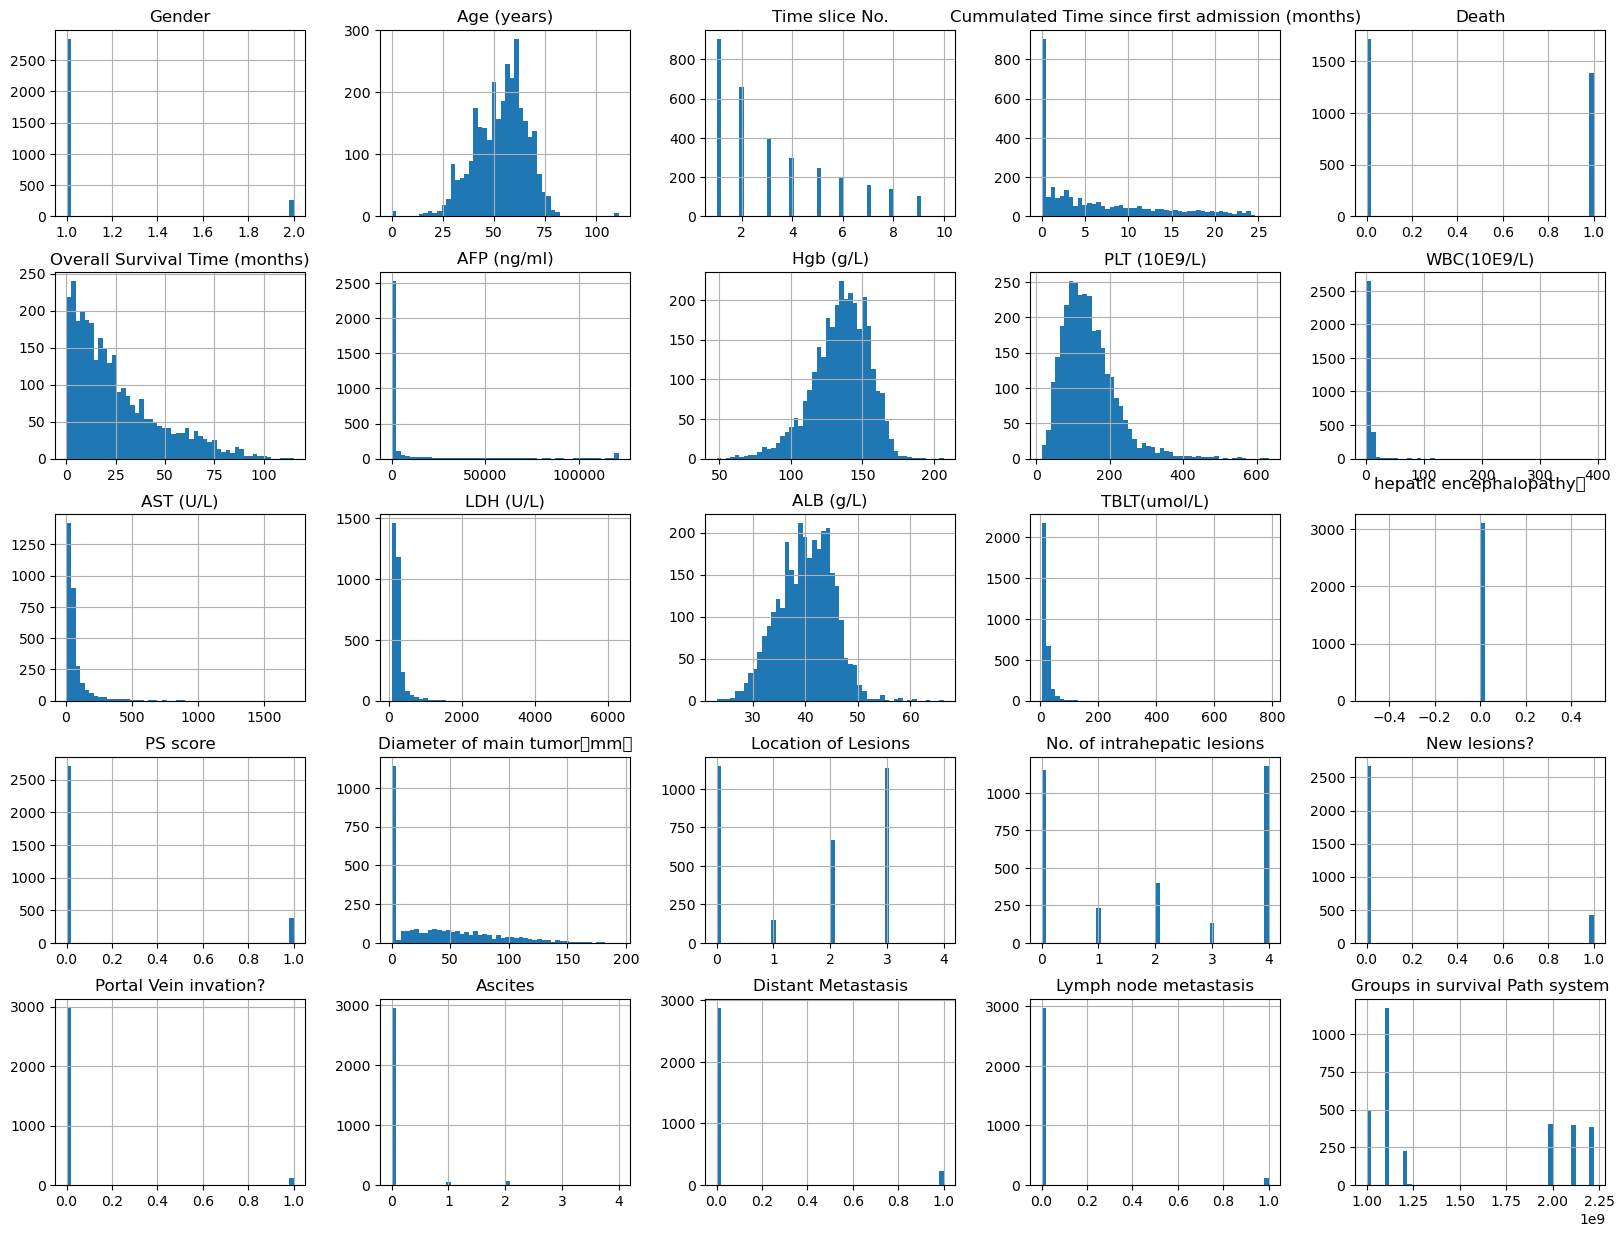

In [15]:
# Histogram
data.hist(bins=50, figsize=(20,15))
plt.show()

In [16]:
# Notice that this Hepatic encephalopathy: a column of eigenvalues are 0, in order not to interfere with the statistical analysis so delete by column

# Get the column name
column_to_drop = data.columns[15]  

# Delete Columns
data = data.drop(column_to_drop, axis=1)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16664\1844946004.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()
D:\soft\ANACONDA3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.draw()
D:\soft\ANACONDA3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.draw()
D:\soft\ANACONDA3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\soft\ANACONDA3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.

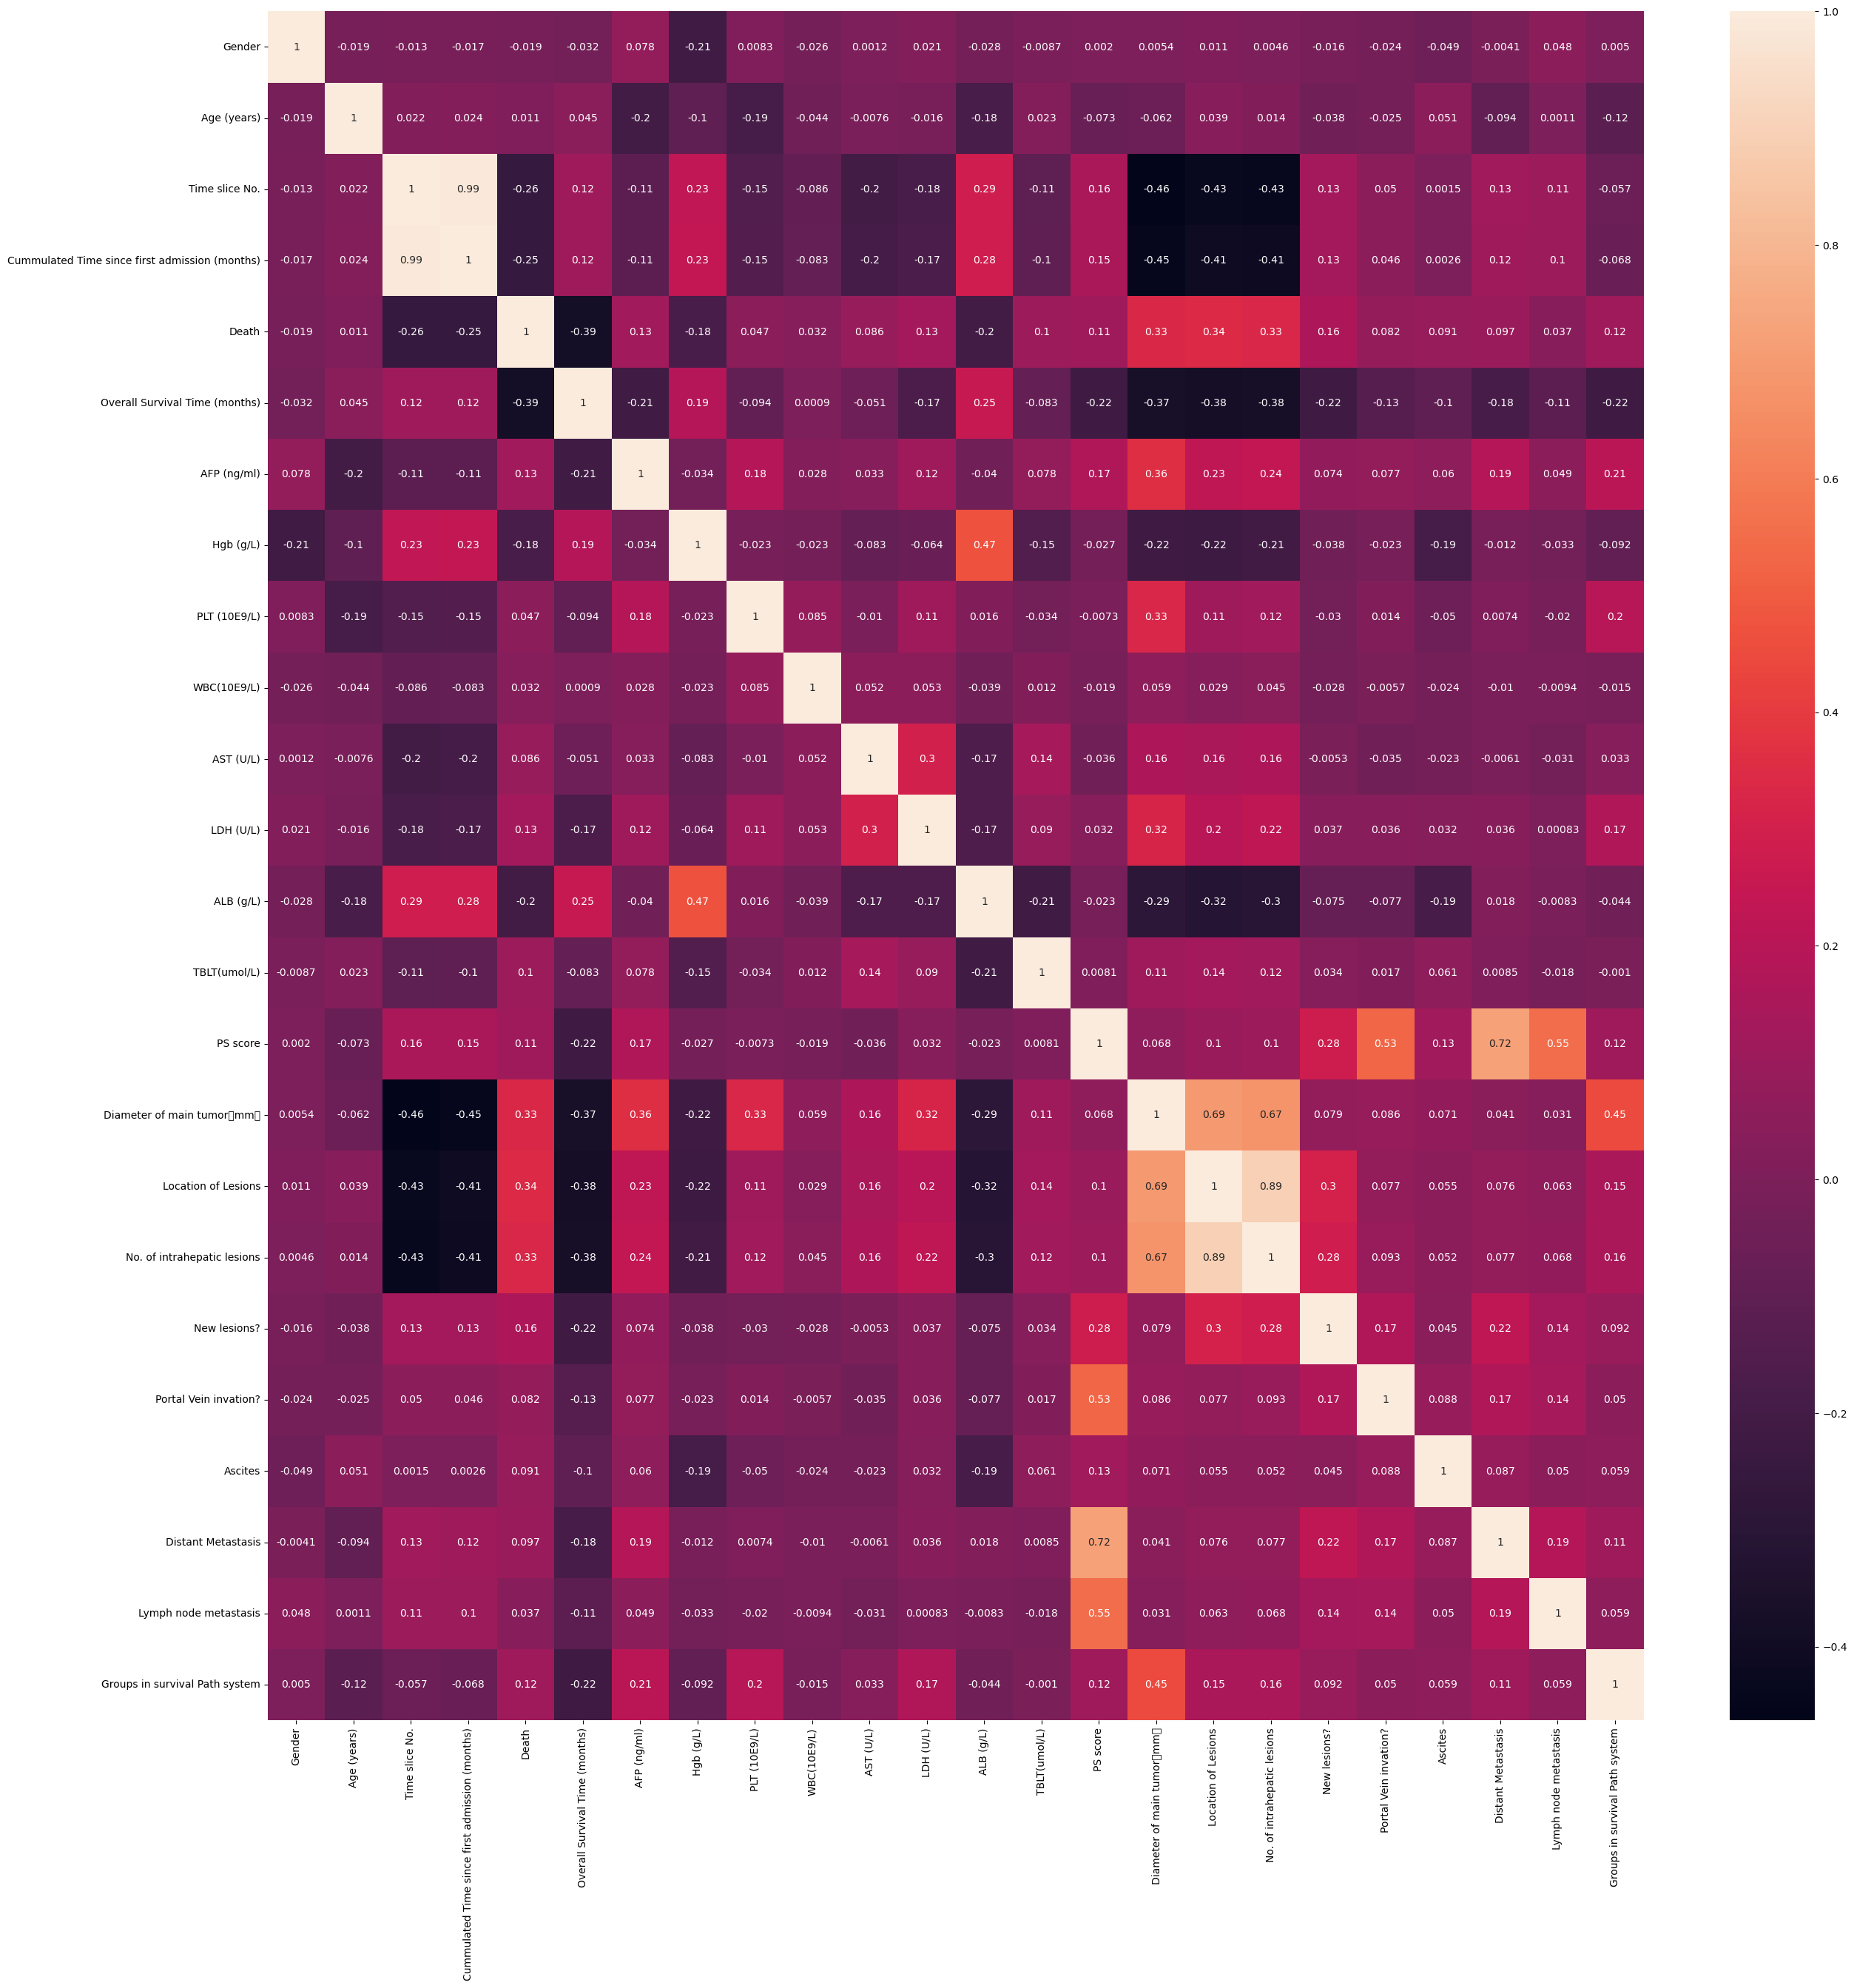

In [17]:
# Correlation coefficient matrix
corr_matrix = data.corr()
# Heat map
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Variable-length time series processing

In [18]:
# Organize the data into {id: [time_slice1, time_slice2, ...]} in the form of
data_dict = {}
for id_no, group_df in data.groupby('ID_No'):
    data_dict[id_no] = group_df.drop(columns='ID_No').values.tolist()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3102 entries, 0 to 3773
Data columns (total 28 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID_No                                           3102 non-null   object 
 1   Gender                                          3102 non-null   int64  
 2   Age (years)                                     3102 non-null   int64  
 3   Time slice No.                                  3102 non-null   int64  
 4   Cummulated Time since first admission (months)  3102 non-null   float64
 5   Death                                           3102 non-null   int64  
 6   Overall Survival Time (months)                  3102 non-null   float64
 7   AFP (ng/ml)                                     3102 non-null   float64
 8   Hgb (g/L)                                       3102 non-null   float64
 9   PLT (10E9/L)                             

In [20]:
# Print to see
for id_no, time_slices in data_dict.items():
    print(f"ID_No: {id_no}, Number of Time Slices: {len(time_slices)}")

ID_No: Deri_Patient1, Number of Time Slices: 3
ID_No: Deri_Patient10, Number of Time Slices: 1
ID_No: Deri_Patient100, Number of Time Slices: 9
ID_No: Deri_Patient101, Number of Time Slices: 1
ID_No: Deri_Patient102, Number of Time Slices: 2
ID_No: Deri_Patient103, Number of Time Slices: 1
ID_No: Deri_Patient104, Number of Time Slices: 2
ID_No: Deri_Patient105, Number of Time Slices: 1
ID_No: Deri_Patient106, Number of Time Slices: 9
ID_No: Deri_Patient107, Number of Time Slices: 2
ID_No: Deri_Patient108, Number of Time Slices: 3
ID_No: Deri_Patient109, Number of Time Slices: 1
ID_No: Deri_Patient11, Number of Time Slices: 5
ID_No: Deri_Patient110, Number of Time Slices: 1
ID_No: Deri_Patient111, Number of Time Slices: 1
ID_No: Deri_Patient112, Number of Time Slices: 1
ID_No: Deri_Patient113, Number of Time Slices: 9
ID_No: Deri_Patient114, Number of Time Slices: 2
ID_No: Deri_Patient115, Number of Time Slices: 1
ID_No: Deri_Patient116, Number of Time Slices: 2
ID_No: Deri_Patient117, 

In [21]:
# patients
num_patients = len(data_dict)
print(f"Number of Patients: {num_patients}")

Number of Patients: 951


In [22]:
# Statistical information on the number of time slices
num_time_slices = [len(time_slices) for time_slices in data_dict.values()]
print(f"Max Number of Time Slices: {max(num_time_slices)}")
print(f"Min Number of Time Slices: {min(num_time_slices)}")
print(f"Average Number of Time Slices: {sum(num_time_slices) / num_patients}")

Max Number of Time Slices: 9
Min Number of Time Slices: 1
Average Number of Time Slices: 3.2618296529968456


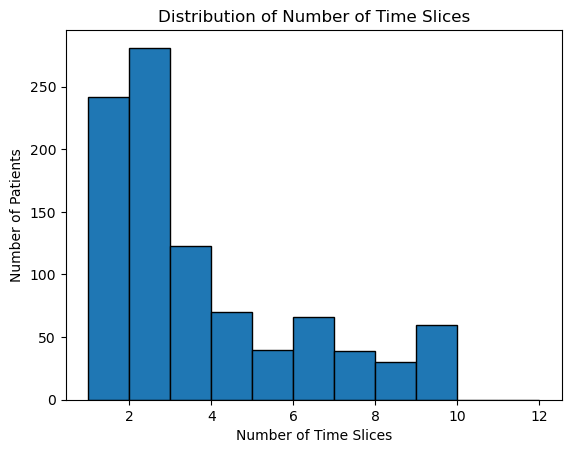

In [23]:
# Distribution of the number of patient time slices
import matplotlib.pyplot as plt
plt.hist(num_time_slices, bins=range(1, 13), edgecolor='black')
plt.xlabel('Number of Time Slices')
plt.ylabel('Number of Patients')
plt.title('Distribution of Number of Time Slices')
plt.show()

In [24]:
# Statistical information on the characteristics of time slices
all_time_slices = [time_slice for time_slices in data_dict.values() for time_slice in time_slices]
df_time_slices = pd.DataFrame(all_time_slices, columns=data.columns[1:])  
print(df_time_slices.describe())

            Gender  Age (years)  Time slice No.  \
count  3102.000000  3102.000000     3102.000000   
mean      1.084462    53.276596        3.281754   
std       0.278124    12.687582        2.333231   
min       1.000000     0.000000        1.000000   
25%       1.000000    45.000000        1.000000   
50%       1.000000    55.000000        2.000000   
75%       1.000000    62.000000        5.000000   
max       2.000000   111.000000       10.000000   

       Cummulated Time since first admission (months)        Death  \
count                                     3102.000000  3102.000000   
mean                                         6.222373     0.447453   
std                                          6.872711     0.497311   
min                                          0.000000     0.000000   
25%                                          0.000000     0.000000   
50%                                          3.400000     0.000000   
75%                                         10.500

# Modeling

In [26]:
#import numpy as np
#import pandas as pd
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler, LabelEncoder
#from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import TimeDistributed
#from tensorflow.keras.layers import LSTM, Dense, Masking

# Select features
#input_features = ['PS score', 'AFP (ng/ml)', 'Hgb (g/L)', 'PLT (10E9/L)', 'WBC(10E9/L)', 'AST (U/L)', 'LDH (U/L)', 'ALB (g/L)', 'TBLT(umol/L)', 'Diameter of main tumor（mm）']
#input_features = ['PS score', 'AFP (ng/ml)', 'Hgb (g/L)', 'PLT (10E9/L)', 'WBC(10E9/L)', 'AST (U/L)', 'LDH (U/L)', 'ALB (g/L)', 'TBLT(umol/L)']
#input_features = ['PS score', 'AFP (ng/ml)', 'AST (U/L)', 'ALB (g/L)', 'TBLT(umol/L)']
    
#output_features = ['No. of intrahepatic lesions']
#output_features = ['No. of intrahepatic lesions', 'New lesions?', 'Location of Lesions', 'Distant Metastasis', 'Lymph node metastasis', 'Ascites']

# Data preprocessing
#data = data.set_index(['ID_No', 'Time slice No.']).sort_index()

# Normalize continuous variables
#scaler = MinMaxScaler()
#data[input_features] = scaler.fit_transform(data[input_features])

# Encode categorical variables
#label_encoders = {}
#for feature in output_features:
#    encoder = LabelEncoder()
#    data[feature] = encoder.fit_transform(data[feature])
#    label_encoders[feature] = encoder

In [27]:
# Convert time series data
#X = pad_sequences([data.loc[id_no, input_features].values for id_no in data.index.get_level_values('ID_No').unique()], dtype='float32', value=-1.)
#y = pad_sequences([data.loc[id_no, output_features].values for id_no in data.index.get_level_values('ID_No').unique()], dtype='float32', value=-1.)

# Split train and test data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
#model = Sequential()
#model.add(Masking(mask_value=-1., input_shape=(X_train.shape[1], X_train.shape[2]))) # change mask_value to -1
#model.add(LSTM(10, return_sequences=True))
#model.add(LSTM(10, return_sequences=True))  # Add return_sequences=True here
#model.add(TimeDistributed(Dense(y_train.shape[2], activation='sigmoid')))  # Use TimeDistributed here

# Compile model
#model.compile(loss='binary_crossentropy', optimizer='adam')

# Train model
#model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

In [28]:
#from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
#y_pred = model.predict(X_test)

# Convert the probabilities into class labels
#y_pred_classes = np.argmax(y_pred, axis=-1)
#y_test_classes = np.argmax(y_test, axis=-1)

# Compute the performance metrics
#print(classification_report(y_test_classes.flatten(), y_pred_classes.flatten()))

# Compute confusion matrix
#cm = confusion_matrix(y_test_classes.flatten(), y_pred_classes.flatten())
#print(cm)

In [66]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

df = data

# Coding of categorical variables
le = LabelEncoder()

for col in ['PS score','Location of Lesions','No. of intrahepatic lesions']:
    df[col] = le.fit_transform(df[col])

# Normalization of numerical variables
scaler = MinMaxScaler()
numerical_features = ['AFP (ng/ml)', 'Hgb (g/L)', 'LDH (U/L)', 'ALB (g/L)', 'TBLT(umol/L)']  
df[numerical_features] = scaler.fit_transform(df[numerical_features])



In [79]:
# Sort data by patient and time step
df = df.sort_values(['ID_No', 'Time slice No.'])

# Grouping by patient, then constructing input and output sequences for each patient's data
input_features = ['AFP (ng/ml)', 'Hgb (g/L)', 'LDH (U/L)', 'TBLT(umol/L)', 'ALB (g/L)', 'PS score', 'Diameter of main tumor（mm）', 'Location of Lesions', 'No. of intrahepatic lesions']
output_features = ['Death']

X = []
y = []

for _, group in df.groupby('ID_No'):
    X.append(group[input_features].values)
    y.append(group[output_features].values)
    

# Padding of input and output sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences(X, dtype='float32', padding='post', value=-1)

from tensorflow.keras.utils import to_categorical

y = [to_categorical(lesions, num_classes=2) for lesions in y]  # num_classes is the total number of categories plus 1
y = pad_sequences(y, padding='post', value=-1)

# Divide the data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # 80% of the data is used for training and 20% for testing

# Build and train the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(Masking(mask_value=-1))
model.add(SimpleRNN(50, return_sequences=True))
model.add(LSTM(10, return_sequences=True))
model.add(Dense(2, activation='softmax'))  # Update the output layer to have 2 cells and use the softmax activation function

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=55)  # Use the test set as the validation set




Epoch 1/200
14/14 [==============================] - 5s 85ms/step - loss: 0.6725 - accuracy: 0.5992 - val_loss: 0.6201 - val_accuracy: 0.6537
Epoch 2/200
14/14 [==============================] - 0s 7ms/step - loss: 0.6281 - accuracy: 0.6454 - val_loss: 0.6012 - val_accuracy: 0.6639
Epoch 3/200
14/14 [==============================] - 0s 7ms/step - loss: 0.6248 - accuracy: 0.6450 - val_loss: 0.5979 - val_accuracy: 0.6639
Epoch 4/200
14/14 [==============================] - 0s 7ms/step - loss: 0.6215 - accuracy: 0.6478 - val_loss: 0.6014 - val_accuracy: 0.6537
Epoch 5/200
14/14 [==============================] - 0s 7ms/step - loss: 0.6220 - accuracy: 0.6514 - val_loss: 0.6007 - val_accuracy: 0.6622
Epoch 6/200
14/14 [==============================] - 0s 7ms/step - loss: 0.6192 - accuracy: 0.6546 - val_loss: 0.5951 - val_accuracy: 0.6672
Epoch 7/200
14/14 [==============================] - 0s 7ms/step - loss: 0.6163 - accuracy: 0.6534 - val_loss: 0.6015 - val_accuracy: 0.6537
Epoch 8/200


Epoch 59/200
14/14 [==============================] - 0s 7ms/step - loss: 0.5633 - accuracy: 0.6952 - val_loss: 0.5896 - val_accuracy: 0.6689
Epoch 60/200
14/14 [==============================] - 0s 7ms/step - loss: 0.5536 - accuracy: 0.7008 - val_loss: 0.5908 - val_accuracy: 0.6723
Epoch 61/200
14/14 [==============================] - 0s 8ms/step - loss: 0.5547 - accuracy: 0.6960 - val_loss: 0.5867 - val_accuracy: 0.6774
Epoch 62/200
14/14 [==============================] - 0s 8ms/step - loss: 0.5607 - accuracy: 0.6876 - val_loss: 0.5933 - val_accuracy: 0.6841
Epoch 63/200
14/14 [==============================] - 0s 8ms/step - loss: 0.5552 - accuracy: 0.6952 - val_loss: 0.5869 - val_accuracy: 0.6757
Epoch 64/200
14/14 [==============================] - 0s 8ms/step - loss: 0.5550 - accuracy: 0.7020 - val_loss: 0.5838 - val_accuracy: 0.6672
Epoch 65/200
14/14 [==============================] - 0s 8ms/step - loss: 0.5461 - accuracy: 0.6980 - val_loss: 0.5893 - val_accuracy: 0.6757
Epoch 

14/14 [==============================] - 0s 7ms/step - loss: 0.4570 - accuracy: 0.7546 - val_loss: 0.7290 - val_accuracy: 0.6301
Epoch 174/200
14/14 [==============================] - 0s 7ms/step - loss: 0.4631 - accuracy: 0.7594 - val_loss: 0.6972 - val_accuracy: 0.6402
Epoch 175/200
14/14 [==============================] - 0s 6ms/step - loss: 0.4542 - accuracy: 0.7637 - val_loss: 0.7096 - val_accuracy: 0.6503
Epoch 176/200
14/14 [==============================] - 0s 6ms/step - loss: 0.4478 - accuracy: 0.7661 - val_loss: 0.6891 - val_accuracy: 0.6419
Epoch 177/200
14/14 [==============================] - 0s 7ms/step - loss: 0.4512 - accuracy: 0.7637 - val_loss: 0.7179 - val_accuracy: 0.6537
Epoch 178/200
14/14 [==============================] - 0s 7ms/step - loss: 0.4612 - accuracy: 0.7558 - val_loss: 0.7183 - val_accuracy: 0.6436
Epoch 179/200
14/14 [==============================] - 0s 7ms/step - loss: 0.4726 - accuracy: 0.7514 - val_loss: 0.6788 - val_accuracy: 0.6605
Epoch 180/200

In [80]:
from sklearn.metrics import classification_report
import numpy as np

# Get the predictions of the model on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)  # Get the predicted categories

# Convert both real and predicted labels into 1-dimensional arrays
y_true = np.argmax(y_test, axis=-1).reshape(-1)
y_pred = y_pred.reshape(-1)

# Get and print the classification report
report = classification_report(y_true, y_pred)
print(report)


6/6 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.48      0.62      1468
           1       0.16      0.56      0.24       251

    accuracy                           0.49      1719
   macro avg       0.51      0.52      0.43      1719
weighted avg       0.76      0.49      0.56      1719



In [ ]:
data.info()